In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
features = ["pclass" , "sex" , "age" , "embarked" , "fare"]
target = ["survived"]

In [4]:
# filling null values
from sklearn.impute import SimpleImputer

imp_age = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_age.fit_transform(titanic[["age"]])

imp_embarked = SimpleImputer(strategy = "most_frequent")
titanic[["embarked"]] = imp_embarked.fit_transform(titanic[["embarked"]])

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [7]:
X = titanic[features]
y = titanic[target]

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.3 , random_state = 42
)

In [8]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = DT.predict(X_test)

print("Accuraccy :" , accuracy_score(y_test , y_pred))

Accuraccy : 0.7574626865671642


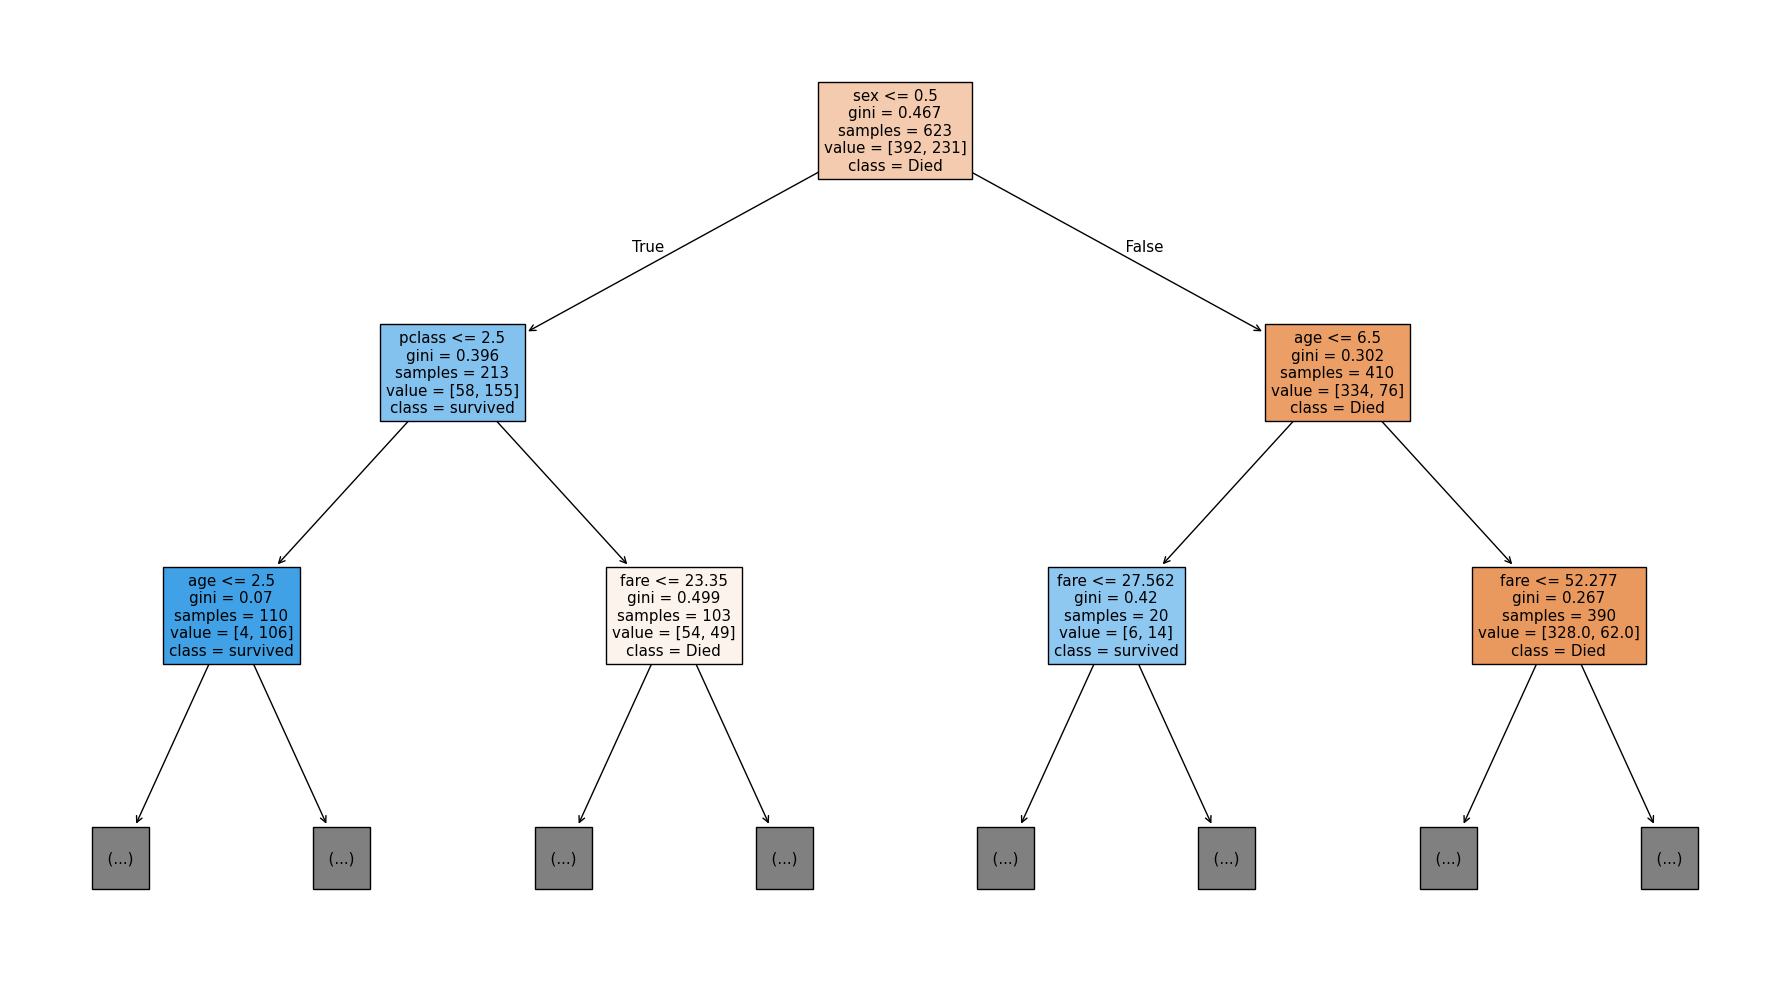

In [10]:
plt.figure(figsize = (18 , 10))

from sklearn.tree import plot_tree

plot_tree( DT, feature_names = titanic[features].columns , class_names = ["Died" , "survived"] , filled = True, max_depth = 2 )

plt.tight_layout() 
plt.show()

# post prunning

In [11]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

ccp_alphas

In [12]:
trees = []
for alpha in ccp_alphas:
    DT = DecisionTreeClassifier(max_depth = 4 , ccp_alpha = alpha)
    DT.fit(X_train , y_train)

    acc = DT.score(X_test , y_test)

    print(f"CCP alpha = {alpha} , Accuracy = {acc}")
    trees.append((DT , alpha))

CCP alpha = 0.0 , Accuracy = 0.8246268656716418
CCP alpha = 0.0 , Accuracy = 0.8246268656716418
CCP alpha = 0.0001337613697164259 , Accuracy = 0.8246268656716418
CCP alpha = 0.00013376136971642635 , Accuracy = 0.8246268656716418
CCP alpha = 0.0002293052052281582 , Accuracy = 0.8246268656716418
CCP alpha = 0.00032102728731942215 , Accuracy = 0.8246268656716418
CCP alpha = 0.0004840887665927798 , Accuracy = 0.8246268656716418
CCP alpha = 0.0005350454788657034 , Accuracy = 0.8246268656716418
CCP alpha = 0.0005350454788657034 , Accuracy = 0.8246268656716418
CCP alpha = 0.0005350454788657034 , Accuracy = 0.8246268656716418
CCP alpha = 0.0006274624252152341 , Accuracy = 0.8246268656716418
CCP alpha = 0.0006420545746388443 , Accuracy = 0.8246268656716418
CCP alpha = 0.000777089862162093 , Accuracy = 0.8246268656716418
CCP alpha = 0.0008560727661851258 , Accuracy = 0.8246268656716418
CCP alpha = 0.0009363295880149813 , Accuracy = 0.8246268656716418
CCP alpha = 0.0009630818619582662 , Accuracy 

In [13]:
best_alpha = 0
best_acc = 0

for DT , alpha in trees:
    curr_acc = DT.score(X_test , y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [14]:
print(f"Best Accuracy of model is {best_acc} & alpha = {best_alpha}")

Best Accuracy of model is 0.8246268656716418 & alpha = 0.0


# Decision Tree Regressor


In [15]:
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame = True).frame

In [16]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
X = df.drop(columns = ["target"] , axis = 1)
y = df["target"]

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.3 , random_state = 42
)

In [26]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 7 , min_samples_leaf = 20)
model.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)

In [28]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print("MSE :" , mean_squared_error(y_test , y_pred))

MSE : 3177.664925233041


In [31]:
# post prunning

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


trees = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(max_depth = 4 , ccp_alpha = alpha)
    model.fit(X_train , y_train)

    y_pred = model.predict(X_test)

    print(f"CCP alpha = {alpha} , MSE = {mean_squared_error(y_test , y_pred)}")
    trees.append((model , alpha))

CCP alpha = 0.0 , MSE = 3656.6870474838197
CCP alpha = 0.8559870550161812 , MSE = 3651.06674673194
CCP alpha = 6.990291262135923 , MSE = 3676.690806882316
CCP alpha = 20.593092547404055 , MSE = 3496.7245128311556
CCP alpha = 38.45145631067961 , MSE = 3511.279024109351
CCP alpha = 78.371859889587 , MSE = 3585.7740215857416
CCP alpha = 93.9404098858405 , MSE = 3696.579211615812
CCP alpha = 94.00543851431632 , MSE = 3710.3005316402705
CCP alpha = 94.03962542312098 , MSE = 3803.463705704157
CCP alpha = 112.03010222427713 , MSE = 3788.1455444658377
CCP alpha = 119.09208982923042 , MSE = 3675.9467308910776
CCP alpha = 126.24659235440458 , MSE = 3265.1012945336884
CCP alpha = 207.33397855516478 , MSE = 3479.644254558814
CCP alpha = 434.19302235262944 , MSE = 3546.741044954467
CCP alpha = 436.3442287203411 , MSE = 4280.762895394589
CCP alpha = 1835.2873844480928 , MSE = 5432.886351282108


In [33]:
best_alpha  = 0
best_MSE = 10000

for model , alpha in trees:
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test , y_pred)
    if MSE < best_MSE:
        best_MSE = MSE
        best_alpha = alpha

print(f"MSE = {best_MSE} for alpha = {best_alpha}")

MSE = 3265.1012945336884 for alpha = 126.24659235440458
